<center><h2> Kaon State Oscillations</h2></center>
<p>
The oscillation of kaons (K mesons) between different CP states is modeled with wave packets moving between two wells. (Solution of time-dependent Schroedinger equation.) 

In [1]:
""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased).
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2021. 
    Please respect copyright & acknowledge our work."""

#KaonStates.ipynb: oscillations between two kaon states
# plo1 potentials separated in ax1
# plo2: left package
# plo3: right package
# plo4: potential figure below  
# plo5: L to R

% matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.animation as animation
import time

<IPython.core.display.Javascript object>


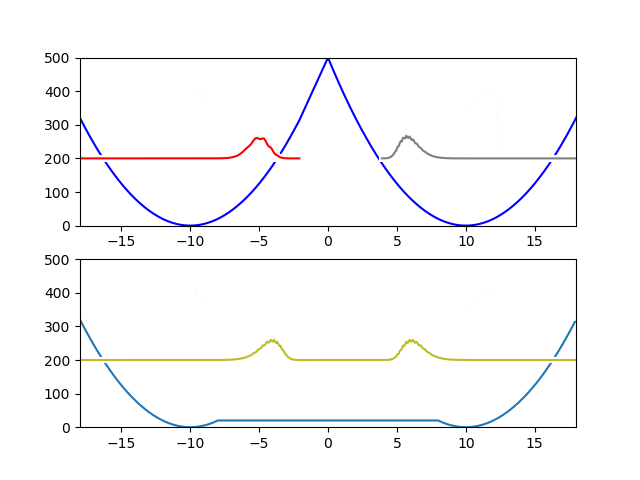

In [2]:
dx  =  0.08;    dx2  =  dx*dx;  k0  =  2.;  dt  =  dx2/8.0;
k0 = 12.5                                    # wavepacket wave vector
nmax = 200
addi = 250
xall = np.zeros((450),float)                  
xx = np.zeros((nmax+addi),float)
x = np.zeros((nmax+addi),float)
xA = np.zeros((nmax+addi), float)
V = np.zeros((nmax+addi),float)               # potential-red
vR = np.zeros((nmax+1),float)
psr = np.zeros((nmax+1),float)                 # for real part wave function Left
psi = np.zeros((nmax+1),float)                 # for imaginary part left packet
prob = np.zeros((nmax+1),float)                # for probability: wavefunction **2
psrR = np.zeros((nmax+1),float)                # for real part wave function Right
psiR = np.zeros((nmax+1),float)                # for imaginary part right packet
probR = np.zeros((nmax+1),float)               # for probability: right packet **2
vA = np.zeros((nmax+addi),float)               # potential down figure
psrAL = np.zeros((nmax+addi),float)            # for left packet left figure
psiAL = np.zeros((nmax+addi),float)            # for down fig left packet 
probAL = np.zeros((nmax+addi),float)           # probability down
psrAR = np.zeros((nmax+addi),float)            # for right package right figure right
psiAR = np.zeros((nmax+addi),float)
probAR = np.zeros((nmax+addi),float)
PlotAllR = np.zeros((nmax+addi),float)          # probab down figure

def potentials(xx,x):                         #computes potentials
    for i in range(0,nmax+1):
        xx[i] = -18.0+i*dx                     # for left well  upper figure            
        V[i] = 10* (xx[i]+10)**2/2
    for j in range(nmax,nmax+addi):    
        xx[j] = -16. +j*dx   
        V[j] = 10*(xx[j]-10)**2/2             # for right well down figure
       
    for j in range(0,nmax+addi):
        x[j] = -18+j*dx
        if j <= 125:        vA[j] = 10.*(x[j]+10)**2/2 # left side
        if j>125 and j<325: vA[j] = vA[125]  # perturbation lowers middle
        if j> = 325:  vA[j] = 10.0*(x[j]-10)**2/2  # potential down figure
            
potentials(xx,x)                            
fig  =  plt.figure()                          
ax1 = fig.add_subplot(2,1,1)                 # axis upper figure
ax1.set_xlim(-18,18)                         # x limits upper figure
ax1.set_ylim(0,500)                          # y limits upper figure
ax2  =  fig.add_subplot(2, 1, 2)             # down figure
ax2.set_xlim(-18,18)                         # x y limits down
ax2.set_ylim(0,500)
plo1 = ax1.plot(xx,V,'b')                    # plot potential upfigure
i = 0
for xleft in np.arange(-18.,-2.,0.08):        
  psr[i]  =  np.exp(-5*((xleft+10))**2) * np.cos(k0*xleft)    # RePsi Left
  psi[i]  =  np.exp(-5*((xleft+10))**2) * np.sin(k0*xleft)    # Im Psi
  prob [i]  =  psr[i]*psr[i] + psi[i]*psi[i]                  # probability
  i += 1
j = 0  
for xright in np.arange(2,18.,0.08):
   psrR[j]  =  np.exp(-5*((xright-10))**2)*np.cos(-k0*xright)    # Re Psi Right
   psiR[j]  =  np.exp(-5*((xright-10))**2)*np.sin(-k0*xright)    # Im Psi
   probR[j]   =  psrR[j]**2 + psiR[j]**2                     # probability
   j+= 1
plo2 = ax1.plot(xx[:200],200+200*prob[:nmax],'r')            # left packet red  
plo3 = ax1.plot(xx[250:],200+200*probR[:-1])                 # right packet 

for i in range (0,450):                                      # initial conditions
    xA[i] = -18+i*dx                                         #  -18 <= x <= 18
    if i <= 225:                 
         psrAL[i] = np.exp(-5*(xA[i]+10)**2)*np.cos(k0*xA[i])  # to middle
         psiAL[i] = np.exp(-5*(xA[i]+10)**2)*np.sin(k0*xA[i])
    else:                                      # too small make it 0
         psrAL[i] = 0.
         psiAL[i] = 0.
    probAL[i]  =  psrAL[i]**2 + psiAL[i]**2                  # probability packet down well
    plo4 = ax2.plot(x,vA)                                       # potential figure below
plo5 = ax2.plot(xA,200+200*probAL)                          # plot potential down

for j in range(0,450):                                    # amplitudes 
    x = -18+j*dx
    if j <= 225:
          psrAR[j] = 0.  # too smalll make it 0
          psiAR[j] = 0.       
    else:
         psrAR[j] = np.exp(-5*(x-10)**2)*np.cos(-k0*x) # packet moving left
         psiAR[j] = np.exp(-5*(x-10)**2)*np.sin(-k0*x)          
    probAR[j]  =  psrAR[j]**2 + psiAR[j]**2
              
def updateData(dum):               # animated figures
   global psr
   global psi
   global prob
   global probR
   global psiR
   global psrR 
   psr[1:-1]  =  psr[1:-1] - (dt/dx2)*(psi[2:]+psi[:-2]-2*psi[1:-1]) +dt*V[1:nmax]*psi[1:-1]
   psi[1:-1]  =  psi[1:-1] + (dt/dx2)*(psr[2:]+psr[:-2]-2*psr[1:-1]) -dt*V[1:nmax]*psr[1:-1]
   for i in range(0,nmax):
     prob [i]  =  psr[i]**2 + psi[i]**2      
   plo2 = ax1.plot(xx[:200],200+200*prob[:nmax],'w',linewidth = 4) # l packet erase wi white
   time.sleep(0.01)                                            # sleep fig a little
   plo2 = ax1.plot(xx[:200],200+200*prob[:nmax],'r')             # L packet in red
   psrR[1:-1]  =  psrR[1:-1] - (dt/dx2)*(psiR[2:]+psiR[:-2]-2*psiR[1:-1]) +dt*vR[1:-1]*psiR[1:-1] 
   psiR[1:-1]  =  psiR[1:-1] + (dt/dx2)*(psrR[2:]+psrR[:-2]-2*psrR[1:-1]) -dt*vR[1:-1]*psrR[1:-1]
   k = 0
   for  i in np.arange(2.0, 18,0.08 ):        
        probR[k] =  psrR[k]**2 + psiR[k]**2 # for packet moving to left left figure
        k += 1
   plo3 = ax1.plot(xx[249:],200+200*probR,'w',linewidth = 4) # right packet erase with white
   time.sleep(0.01)
   plo3 = ax1.plot(xx[249:],200+200*probR)                 # right packet above
   psrAL[1:-1]  =  psrAL[1:-1] - (dt/dx2)*(psiAL[2:]+psiAL[:-2]-2*psiAL[1:-1]) +dt*vA[1:-1]*psiAL[1:-1]
   psiAL[1:-1]  =  psiAL[1:-1] + (dt/dx2)*(psrAL[2:]+psrAL[:-2]-2*psrAL[1:-1]) -dt*vA[1:-1]*psrAL[1:-1]
   psrAR[1:-1]  =  psrAR[1:-1] - (dt/dx2)*(psiAR[2:]+psiAR[:-2]-2*psiAR[1:-1]) \
                 +dt*vA[1:-1]*psiAR[1:-1]
   psiAR[1:-1]  =  psiAR[1:-1] + (dt/dx2)*(psrAR[2:]+psrAR[:-2]-2*psrAR[1:-1]) \
                -dt*vA[1:-1]*psrAR[1:-1]
   i = 0
   for xall in np.arange(-18,18,0.08):  
       probAL[i] = psrAL[i]**2 + psiAL[i]**2  + psrAL[i]**2 + psiAL[i]**2           
       i += 1
   i = 0
   for xall in np.arange(-18,18,0.08):  
       PlotAllR[i] =  200*(psrAR[i]**2 + psiAR[i]**2)  +200*( psrAL[i]**2 + psiAL[i]**2)               
       i += 1 
   plo5 = ax2.plot(xx[:],200+PlotAllR[:],'w',linewidth = 4) #    lower figure in white-erase-
   time.sleep(0.01)
   plo5 = ax2.plot(xx[:],200+PlotAllR[:])                 # plot down packages 
   return  plo2, plo3, plo5                             # moving packets
ani  =  animation.FuncAnimation(fig, updateData,frames = 20,interval = 100,blit = False)# animation called
plt.show()    